## Credit Card Fraud Detection

This project will you help you understand the basics of fitting a classification model. In this you will learn
* How to clean the data
* How to choose metrics
* How to fit a Logistic Regression Model

In [58]:
# These are package to be loaded
# Do not alter

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Data Cleaning

### Task 1-1 : Load the data

- **Description**: Load the data from file `train.csv` and assign it to variable `train_df`
- **Code Instruction**: 
    1. Import dataset using the path `train.csv` and assign to `train_df`
    2. From the column anmes, get all columns but the last one and assign it to `feats` as a list
    3. Get the last column names and assign it to `label`


A bit about the data

- Transaction_Amount: The dollar amount of the transaction.
- Transaction_Time: The time of the transaction since the start of the day (in seconds).
- Account_Age: The age of the user’s account in days.
- Daily_Transaction_Count: The number of transactions made by the user that day.
- Transaction_Latency: The time delay between the current transaction and the previous one (in seconds).
- Average_Monthly_Spend: The average monthly spend of the user.
- Credit_Score: The user’s credit score.
- Remaining_Balance: The remaining balance in the user’s account after the transaction.
- Account_Limit_Utilization: The percentage of the credit limit used.
- Merchant_Transaction_Volume: The average transaction volume for the merchant over the past month.


In [75]:
train_df = pd.read_csv("train_data.csv")
feats = list(train_df.columns[:-1])
print(feats)
label = train_df.columns[-1]

['Transaction_Amount', 'Transaction_Time', 'Account_Age', 'Daily_Transaction_Count', 'Transaction_Latency', 'Average_Monthly_Spend', 'Credit_Score', 'Remaining_Balance', 'Account_Limit_Utilization', 'Merchant_Transaction_Volume']


### Task 1-2: Understand the data

- **Description**: In this task, have a look at a sample of train data and understand what the feature values looks like
- **Code Instruction**: 
    1. Take a look at the top n rows of data
    2. Get the summary statistics of the numeric features in the data
    3. Get the distribution of feature values for categorical features in the data

In [60]:
# TODO: Solution below, please remove 
train_df.head()

,Transaction_Amount,Transaction_Time,Account_Age,Daily_Transaction_Count,Transaction_Latency,Average_Monthly_Spend,Credit_Score,Remaining_Balance,Account_Limit_Utilization,Merchant_Transaction_Volume,Fraud
0,124.835708,27756.446983,68.674859,2,73.562202,2107.627383,694.215760,3140.902526,91.000714,53278.227689,0
1,93.086785,8900.858400,155.444490,3,1547.741724,1782.120464,728.628420,4116.838742,18.128548,26981.999020,0
2,132.384427,6204.171926,NaN,3,49.684162,1472.031278,618.914746,3209.768114,24.546524,60208.202833,0
3,176.151493,8145.444490,553.966077,4,147.847071,2026.482766,679.676341,7657.835112,56.747447,57835.481840,0
4,88.292331,50359.912807,121.219761,2,346.123100,2345.580925,764.104347,5334.894793,55.800910,52802.400388,0


# TODO: Solution below, please remove
train_df.describe()

## Task 1-3: Remove any duplicate rows

- **Description**: In this task,remove any duplicate rows in the data
- **Code Instruction**: Complete the function to return a datafarme with de-duplicated dataframe

`Ask ChatGPT! : How does duplicate data impact performance of a Logistic Regression model`

In [61]:
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame :
    '''
    Complete this function to return a de-duplicated dataframe
    '''
    
    # TODO: remove the rest of code in this function
    df = df.drop_duplicates()
    return df


# Do not change this code
row_count = remove_duplicates(train_df).shape[0]
print(row_count)
remove_duplicates(train_df.copy())

10000


,Transaction_Amount,Transaction_Time,Account_Age,Daily_Transaction_Count,Transaction_Latency,Average_Monthly_Spend,Credit_Score,Remaining_Balance,Account_Limit_Utilization,Merchant_Transaction_Volume,Fraud
0,124.835708,27756.446983,68.674859,2,73.562202,2107.627383,694.215760,3140.902526,91.000714,53278.227689,0
1,93.086785,8900.858400,155.444490,3,1547.741724,1782.120464,728.628420,4116.838742,18.128548,26981.999020,0
2,132.384427,6204.171926,NaN,3,49.684162,1472.031278,618.914746,3209.768114,24.546524,60208.202833,0
3,176.151493,8145.444490,553.966077,4,147.847071,2026.482766,679.676341,7657.835112,56.747447,57835.481840,0
4,88.292331,50359.912807,121.219761,2,346.123100,2345.580925,764.104347,5334.894793,55.800910,52802.400388,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,165.055103,59005.825721,NaN,6,349.503980,1414.202060,704.776722,8764.721440,57.543940,29057.186916,0
9996,0.082752,73432.347992,328.044895,1,810.454387,2336.490834,723.756178,3685.521773,35.863441,16853.376516,0
9997,64.734164,18638.509576,406.552821,0,548.954336,2818.832479,765.891908,7703.552964,6.021202,40872.051269,0
9998,124.788279,65130.589010,NaN,4,135.753263,1798.514909,707.671744,6206.599895,2.525410,44171.887881,0


## Task 1-4: Fill Missing Values

- **Description** : Fill any missing values in the data with column means for numerical cols and column mode for categorical columsn
- **Code Instruction**: 
    1. Use `train_col_miss` to store mean/mode values for each numerical/categorical cols
    2. Fill missing values with mean/mode in `train_col_miss`
    3. Return a dataframe with missing values filled in

`Ask ChatGPT! : How does missing values impact performance of a Logistic Regression model`

In [62]:
train_col_means = {}
def fill_missing_value(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to fill missing (if there are)
    with the mean value of the column

    `train_col_mean` is a dictionary where keys are features
    and values are mean of field

    Hint: Use feats to iterate through columns
    '''


    # TODO: Solution below, please remove
    for col in feats:
        if train:
            train_col_means[col] = df[col].mean()
        
        df[col] = df[col].fillna(train_col_means[col])

    return df


# Do not change this line of code
train_df = fill_missing_value(train_df.copy(), train=True)

## Task 1-5: Identify outliers

- **Description**: Compelete the below function to clip outlier using `Tukey Outlier method`. Replace the outlier with mean values calculated before.
- **Code Instruction**:
    1. Identify the numerical columns
    2. Identify upper and lower bound using `Tukey Outlier method`
    3. Replace outlier values using mean/model from `train_col_miss` dict defined earlier

`Ask ChatGPT! : How does outlier impact performance of a Logistic Regression Model`


In [63]:
train_col_bounds = {}
def clip_outliers(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to get lower, upper bounds of each col
    Replace low and high with mean values

    `train_col_bounds` is a dictionary where key are features
    and values are tuple (x,y) x being lower bound and y being higher bound

    Hint: Use feats to iterate through columns
    '''

    # TODO: solution below, please remove
    for col in feats:
        if train:
            p25, p75 = df[col].quantile([.25,.75])
            iqr = p75 - p25
            train_col_bounds[col] = (p25 - 1.5 * iqr, p75 + 1.5 * iqr)

        df[col] = df[col].apply(lambda x: train_col_means[col] if (x < train_col_bounds[col][0] or x >  train_col_bounds[col][0]) else x)
    print(train_col_bounds)


# Do not change this code
clip_outliers(train_df.copy(), train=True)

{'Transaction_Amount': (-38.617254365843934, 246.59652744789977), 'Transaction_Time': (-42504.19776700114, 130178.03575774402), 'Account_Age': (-386.06223689075614, 962.7496618754371), 'Daily_Transaction_Count': (-1.0, 7.0), 'Transaction_Latency': (-827.6955261774901, 1840.7199605883752), 'Average_Monthly_Spend': (642.6549102124512, 3356.997989496213), 'Credit_Score': (562.5019104782764, 836.7843808763814), 'Remaining_Balance': (-31.974198523132145, 10062.437847831095), 'Account_Limit_Utilization': (-49.578767077366706, 148.30529077982504), 'Merchant_Transaction_Volume': (-2787.320159953968, 103232.57040353023)}


## Task 1-6: Identify Class Imbalance

- **Description**: Complete this function to return the percentage of 0 labels in the data
- **Code Instruction**:
    1. Copmlete this function to return the percentage of 0-valued labels in the data

`Ask ChatGPT! : How does imbalance impact performance of a Logistic Regression Model`

In [64]:
def test_imbalance(df: pd.DataFrame) -> float:
    '''
    
    '''

    # TODO: Solution below, please remove
    return df[label].value_counts(normalize=True)[1] * 100

test_imbalance(train_df.copy())

2.0

## 2. Feature Engineering

### Task 2-1: Understand feature distributions

 - **Description**: If values across classes for a feature overlaps it tends to reduce Logistic Regression models predictive power. As such its a good idea to look at the distribution of feature values<br>
 - **Code Instruction**: 
    1. Get the column names for numeric fields in the train_df
    2. For each field, plot one histogram each for each label value - showing the spread of the values. 
    3. See if any distribution tend to overlap quite a bit or not.

`Ask ChatGPT: How does feature value overlap influence Logigisic Regression model`

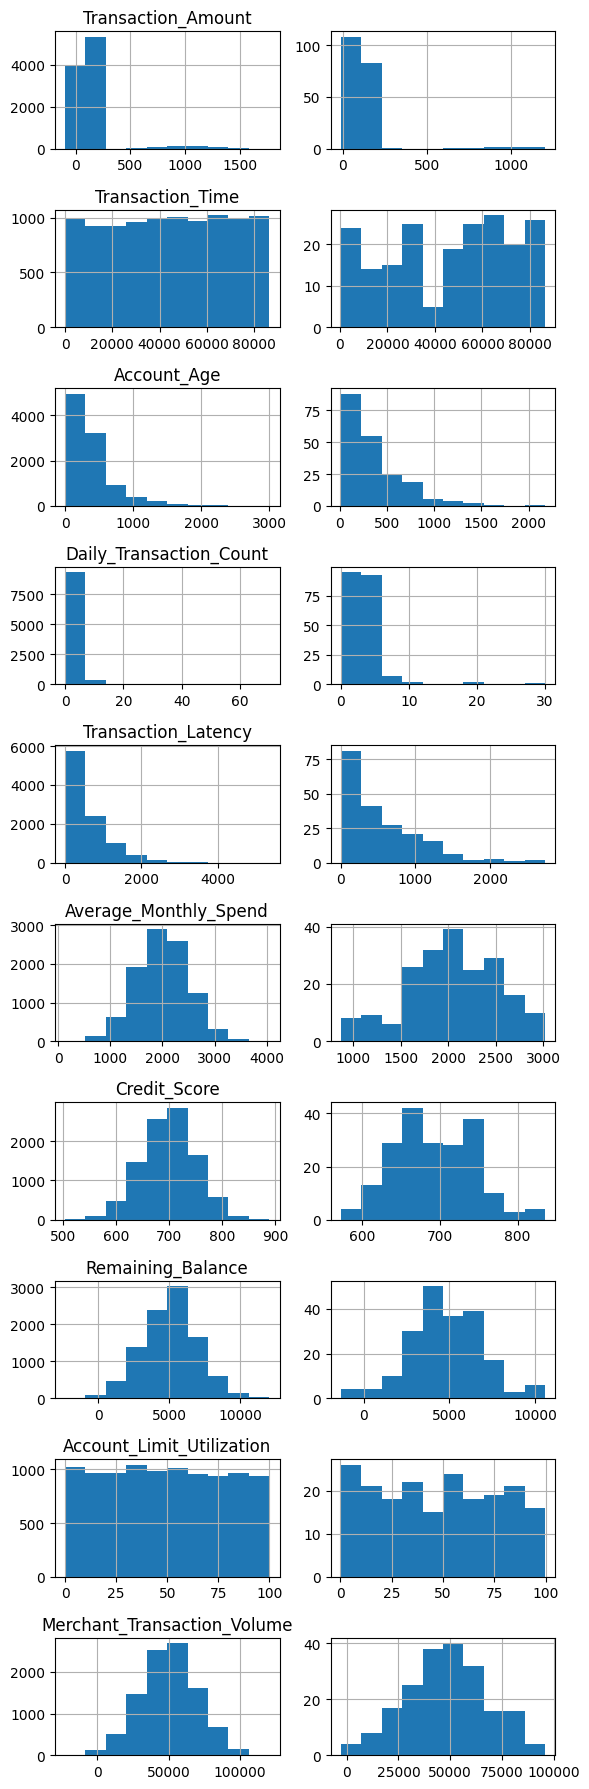

In [65]:
# TODO: Solution below, please remove
fig, axes = plt.subplots(len(feats), 2, figsize=(6, 18))

for i, feat in enumerate(feats):
    train_df[train_df[label]==0][feat].hist(ax=axes[i, 0])
    train_df[train_df[label]==1][feat].hist(ax=axes[i, 1])
    axes[i, 0].set_title(feat)

plt.tight_layout()
plt.show()

### Task 2-2: Feature Correlations for Numerical Features

- **Description**: In this task, calculate pairwise correlation between features
- **Code Instruction**:
    1. Complete the function to calculate all pairwise correlation 
    (Hint: There is in inubilt-function in `pandas`for this)

`Ask ChatGPT! : How do correlated feature impact performance of a Logistic Regression Model.`

In [66]:

def calc_corr(df: pd.DataFrame) -> None:
    '''
    Complete the function to calculate all pairwise correlation
    From the output Identify the pair of features that are highly correlated.
    '''
    
    # TODO: Solution below, please remove
    return df.corr()


# Do not change this code
calc_corr(train_df[feats])


,Transaction_Amount,Transaction_Time,Account_Age,Daily_Transaction_Count,Transaction_Latency,Average_Monthly_Spend,Credit_Score,Remaining_Balance,Account_Limit_Utilization,Merchant_Transaction_Volume
Transaction_Amount,1.000000,-0.015193,0.007185,0.010522,0.024943,-0.002972,0.011388,0.008704,-0.022906,0.000133
Transaction_Time,-0.015193,1.000000,-0.024795,0.003485,-0.015137,-0.011516,-0.008488,-0.028615,-0.002503,-0.002117
Account_Age,0.007185,-0.024795,1.000000,0.016335,-0.004536,0.006086,-0.002571,0.003673,0.001905,0.003787
Daily_Transaction_Count,0.010522,0.003485,0.016335,1.000000,0.009837,0.002780,-0.015680,0.001603,-0.014345,0.006163
Transaction_Latency,0.024943,-0.015137,-0.004536,0.009837,1.000000,0.009419,-0.001141,-0.023858,0.010340,-0.008273
Average_Monthly_Spend,-0.002972,-0.011516,0.006086,0.002780,0.009419,1.000000,-0.013789,0.004287,-0.011532,-0.017225
Credit_Score,0.011388,-0.008488,-0.002571,-0.015680,-0.001141,-0.013789,1.000000,0.002978,-0.006038,0.000771
Remaining_Balance,0.008704,-0.028615,0.003673,0.001603,-0.023858,0.004287,0.002978,1.000000,-0.004490,0.012883
Account_Limit_Utilization,-0.022906,-0.002503,0.001905,-0.014345,0.010340,-0.011532,-0.006038,-0.004490,1.000000,-0.008277
Merchant_Transaction_Volume,0.000133,-0.002117,0.003787,0.006163,-0.008273,-0.017225,0.000771,0.012883,-0.008277,1.000000


### Task 2-3: Identify Predictive Features

- **Description**: Check which of the feature are predictive (i.e. will a donor donate blood). For this you can used a specific statistical test called 'Welch's t-test' and assuming significance alpha = 0.01
- **Code Instruction**: Complete the following function
    1. Return the feature name and p-value from t-test


`Ask ChatGPT:  What is welch's t-test, and t-test - how does it help determing important features`

In [67]:
def run_student_ttest(df, col) -> tuple[str, float]:
    '''
    Write a function to return p-values from the Welch's t-test
    for feature passed into the function
    '''

    # TODO: Solution below, please remove
    t_stat, p_val = stats.ttest_ind(df[df[label]==0][col], df[df[label]==1][col], 
                                        equal_var=False)  # Welch's t-test
    
    return (col, p_val)

for feat in feats:
    run_student_ttest(train_df, feat)

## 3. Understanding Classification Metrics

The most common classification metrics are - 
* Accuraccy
* Precision
* Recall
* F1-Score

Let's Ask ChatGPT what there are - <br>

### Task 3-1: Choosing the right metric

- **Description**: Now having analyzed the data (from Task 1-6), choose the best metrics for your task. 
Assume you got the following information from business - 
* If you prediction someone is going to donate, but they dont - this is huge concern. You want to reduce such `false positives` as much as possible.
* If you predict someone is not going to donate, and they do come - it is ok. The blood donation camp can manage.
Knowing the above - decide which metric to use. <br>
Irrespective of what you use evaluate performance using F1 as well.

- **Code Instruction**: 
    1. Compelete this function to calculate the metric you have chosen

In [68]:
def calc_perf(y_act: list, y_pred: list) -> float:
    '''
    Compelete this function to calculate the metric
    you have chosen
    '''

    # TODO: Solution below, pleas remove
    val = precision_score(y_act, y_pred)
    return val

## 4. Build basline model

Now, finally we can start training the model. When training an ML model its important to have three datasets
* Train dataset - which you use to train the model and learn parameter
* Validation dataset - the dataset to use to figure out which parameter are the best
* Test dataset - the hidden dataset, that you DO NOT look at. Its only use to estimate the performance in future unseen datasets.

### Task 4-1: Preproces the train data to create traininig and validation data

- **Description** : In this task, we will create the datasets required for training the model
- **Code Instruction**: 
    1. Load the train dataset 
    2. ONLY run the de-duplication function on train set
    3. Encode categorical values
    4. `Stratify` split the train dataset 80:20 to creatin a new train dataset and validation set

`Ask ChatGPT: Why is it important to stratify when creating training and validation sets for imbalanced dataset`

In [77]:
def create_dataset(df: pd.DataFrame) -> tuple[np.array, np.array, np. array, np.array]:
    '''
    Remove duplicate data from train file alone (using `remove_duplicates` used earlier)
    Split train file data into train and valid set (keep in mind what we about imbalance learned in Task 5)
        Hint use: train_test_split (set seed to 100), and use the `stratify` field
        Ask ChatGPT: Why is it important to stratify when creating training and validation sets for imbalanced datasets
    
    Return np. arrays for train features, train labels, valid features, valid labels

    '''

    # TODO: Solution below, pleas remove
    df = remove_duplicates(df)
    df = fill_missing_value(df)

    label = list(df.columns)[-1]
    feats = list(df.columns)
    feats.remove(label)

    X = df[feats].values
    y = df[label].values

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                          stratify=y, random_state=100)

    return X_train, y_train, X_valid, y_valid


# Do not change this
X_train, y_train, X_valid, y_valid = create_dataset(pd.read_csv('train_data.csv'))

### Task 4-2: Build Model

- **Description**: Train a basline Logisitc Regression model with default parameters
- **Code Instruction**: 
    1.  Complete this function to train a baseline LogisticRegression Model with default parameter

In [78]:
def train_base(X_train: np.array, y_train: np.array) -> LogisticRegression:
    '''
    Complete this function to
    Train a baseline LogisticRegression Model with default parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove
    model = LogisticRegression(random_state=100)
    model.fit(X_train, y_train)

    return model


# Do not change this
model = train_base(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.0 F1-Score:  0.0


Validation Performance
Selected Metric:  0.0 F1-Score:  0.0


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

## 5.Improving baseline model

### Task 5-1: Fix imbalance to improve performance

- **Description**: Use sampling to balance the number positive and negative samples in the data
- **Code Instruction**: Complete the following function to
    1. Remove duplicate rows in data
    2. Balance the number of positive and negative samples in train_data

In [79]:
def rebalance_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Write a function to 
    (a) remove duplicate rows in data
    (b) balance the number of positive and negative samples in train_data
    Hint: Use downsampling, use random_state = 100

    Return balance dataframe
    '''


    # TODO: Solution below, please remove
    df = remove_duplicates(train_df)

    pos_df = df[df[label] == 1]
    neg_df = df[df[label] == 0]

    df = pd.concat([neg_df.sample(frac=0.4, random_state=100), pos_df])
    return df


# Do not change the following code
# load teh data
train_df = pd.read_csv('train_data.csv')
print(train_df.shape, train_df[label].value_counts(normalize=True))

print("\n\n")

# balance the data
train_df = rebalance_df(train_df)
print(train_df.shape, train_df[label].value_counts(normalize=True))

# check the performance with rebalance dataset
print("\n\n")
X_train, y_train, X_valid, y_valid = create_dataset(train_df)
model = train_base(X_train, y_train)
print(X_train.shape)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

(10000, 11) Fraud
0    0.98
1    0.02
Name: proportion, dtype: float64



(4120, 11) Fraud
0    0.951456
1    0.048544
Name: proportion, dtype: float64



(3296, 10)
Train Performance
Selected Metric:  0.0 F1-Score:  0.0


Validation Performance
Selected Metric:  0.0 F1-Score:  0.0


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 

### Task 5-2: Improve model using Class Weights

- **Description**: Another way to combat data imbalance is configuring class weights in the Logistic Regression model <br>
- **Code Instruction**: Write the function to train a Logistic Regression model
    1. Use in-built parameters of Logistic Regression to weight minority mistake more

`Ask ChatGPT: Why does one of the methods perform better than the other.`
It could be related to the how the feature distribution for both class overlap as seen in Task 2-2

In [80]:
def train_tune_model(X_train: np.array, y_train: np.array):
    '''
    Write the function to train a Logistic Regression model
    and use `class_weight` parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove code
    model = LogisticRegression(class_weight={0:0.25, 1:0.75 }, random_state=100)
    model.fit(X_train, y_train)

    return model


# do no change the following code
train_df = pd.read_csv('train_data.csv')
X_train, y_train, X_valid, y_valid = create_dataset(train_df)

model = train_tune_model(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.0 F1-Score:  0.0


Validation Performance
Selected Metric:  0.0 F1-Score:  0.0


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set 


### Task 5-4: Normalizing Features

- **Describe**: Normalize features to see how it impact perforamance for the Log.Reg model from the task
- **Code Instruction** Complete the function to
    1. Use standard scaling to normalize features 

`Ask ChatGPT what type of feature scaling is best for Logistic Regression and why`

### Bonus [Optional] Task
Fine-tune the Logistic Regression Model.
Some of the parameters you may want to experiment with are - solver, penatly and C

In [82]:
def train_tune_model(X_train: np.array, y_train: np.array, 
                     scaler):
    '''
    Complete this function to normalize features 
    X_train: is the train features values
    y_train: is train labels
    scaler: The scaler you have chosen

    Bonus [Optional] Task : 
    Fine-tune the Logistic Regression Model.
    Some of the parameters you may want to experiment with are - solver, penatly and C
    '''

    # Hint: Use StandardScaler to normalize features
    # Ask ChatGPT what type of feature scaling is best for Logistic Regression and why

    # TODO: Solution below, remove this code
    X_train = scaler.fit_transform(X_train)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return (model, scaler)

scaler = StandardScaler()


# Do not change this code
train_df = pd.read_csv("train_data.csv")
train_df = rebalance_df(train_df)

X_train, y_train, X_valid, y_valid = create_dataset(train_df)
model, scaler = train_tune_model(X_train, y_train, scaler)

X_valid = scaler.transform(X_valid) # we use the same scaler you have used earlier
pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Validation Performance
Selected Metric:  0.0 F1-Score:  0.0


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 5-5: Model Interpretability

- **Description**: Extract the coefficient from the model by completing this function
- **Code Instruction**: Complete the following function to 
    1. Print thte coefficient for each feature
    2. Print the intercept for the Log.Reg model as well

`Ask ChatGPT: How do you interpret coeffcient of a Logistic Regression model`

In [83]:
def get_model_coeff(model : LogisticRegression, feats: list):
    '''
    Complete this function to print pair of values
    (feature name, coeff value)
    '''

    # TODO: Remove this code
    coeffs = list(model.coef_)[0]
    print(coeffs)

    for i in range(len(feats)):
        print(feats[i], coeffs[i])
    
    print("Intercept", model.intercept_)


get_model_coeff(model, list(train_df.columns)[:-1])

[-0.02594214  0.08016173  0.05446021 -0.09993318  0.00047494  0.07177785
 -0.10267666 -0.06420327 -0.07806324 -0.09172657]
Transaction_Amount -0.025942137416164402
Transaction_Time 0.08016172622344078
Account_Age 0.054460213543565734
Daily_Transaction_Count -0.09993318475690988
Transaction_Latency 0.0004749401765591787
Average_Monthly_Spend 0.07177785090718082
Credit_Score -0.10267666035942405
Remaining_Balance -0.0642032689616858
Account_Limit_Utilization -0.07806323557294909
Merchant_Transaction_Volume -0.09172657025941469
Intercept [-2.99941185]
